# BIOE90037 Programming Test 2024

# FIRST: change the notebook name to your surname, you will need to submit the file with your surname on


This exam consists of **four** parts focusing on:

(a) Setting up and loading data into a Pandas dataframe <br>
(b) Calculating descriptive statistics <br>
(c) Data visualization <br>
(d) Performing inferential statistics <br>

*Note*: All parts use the same dataset for each section

**Exam total of 40 points**

5 points - Part (a) <br> 
10 points - Part (b) <br>
10 points - Part (c) <br>
10 points - Part (d) <br> 
5 points - Overall code legibility (Commenting)

You will have a total of **120 minutes** to complete this exam.
    

### Part (a) - Setting up and Loading Data:

1. Import the relevant packages **(1 point)**
<br>

2. Load the file "test_data_2024.csv" into a Pandas dataframe, the numbers refer to the sizes of certain organelles in cells   **(2 points)**
<br>

3. Show the first six rows of the dataframe in the Jupyter Notebook output **(1 point)**
<br>

4. Create a two-entry array where the first entry is the number of distinct experimental conditions considered and the second entry is the number of samples per condition, and print it **(1 point)**
______________________________________________________________________________________________________________________

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('test_data_2024.csv')
print(df.head(6))

# this probably isn't correct but I have no idea what they are actually asking me to do?
array = [4, 50]
print(array)

   Sample no.  Wild type (nm)  Mutant 1 (nm)  Mutant 2 (nm)  Mutant 3 (nm)
0           1      103.925753     132.246309      90.965947     109.645540
1           2      113.018395     114.037491      76.018369     112.958434
2           3       94.063582     137.967673      79.145374      86.716347
3           4      104.363754      64.432761     103.732874      87.549211
4           5       94.956375      96.014864      75.260790      93.541511
5           6      101.021077     109.719864      89.463409      86.014510
[4, 50]


### Part (b) - Descriptive Statistics:
    
1. Find the medians and variances of the four experimental groups        **(2 points)**
<br>

2. Use for loops and if statements to find sample numbers whose values are higher than 2 standard deviations away from the mean for each of the 4 experimental groups, and print their sample numbers and the corresponding experimental conditions       **(4 points)**
<br>    
3. Focusing on the Wild Type group, creat an array of z-scores for each sample in this group, using the formula z = (x - m)/s where m is the group mean and s is the group standard deviation. Then print the first 5 entries of this array.                                       **(4 points)**

______________________________________________________________________________________________________________________

In [24]:
medians = [df.iloc[:,i+1].median() for i in range(4)]
variance = [df.iloc[:,i+1].var() for i in range(4)]

means = [df.iloc[:,i+1].mean() for i in range(4)]
stds = [df.iloc[:,i+1].std() for i in range(4)]

names = ['Wild type (nm)', 'Mutant 1 (nm)', 'Mutant 2 (nm)', 'Mutant 3 (nm)']
for i in range(4):
    for j in range(50):
        val = df.iloc[j,i+1]
        diff = np.abs(val - means[i])
        if diff > (2*stds[i]):
            print(f"Sample Number {j+1} of Experimental Group {names[i]} is greater than two standard deviations away from the mean")

wild_type_z = []
for i in range (50):
    z_score = (df.iloc[i, 1] - means[0])/stds[0]
    wild_type_z = np.append(wild_type_z, z_score)
print('First 5 Wild Type Z-Scores', wild_type_z[0:5])

Sample Number 18 of Experimental Group Wild type (nm) is greater than two standard deviations away from the mean
Sample Number 40 of Experimental Group Wild type (nm) is greater than two standard deviations away from the mean
Sample Number 18 of Experimental Group Mutant 1 (nm) is greater than two standard deviations away from the mean
Sample Number 29 of Experimental Group Mutant 1 (nm) is greater than two standard deviations away from the mean
Sample Number 32 of Experimental Group Mutant 1 (nm) is greater than two standard deviations away from the mean
Sample Number 42 of Experimental Group Mutant 1 (nm) is greater than two standard deviations away from the mean
Sample Number 4 of Experimental Group Mutant 2 (nm) is greater than two standard deviations away from the mean
Sample Number 10 of Experimental Group Mutant 2 (nm) is greater than two standard deviations away from the mean
Sample Number 6 of Experimental Group Mutant 3 (nm) is greater than two standard deviations away from t

### Part (c) - Data Visualization:
   
Plot the data in 2 figures as specified below using appropriate labelling (e.g. x-axis title, y-axis title, title, legend if needed). <br>

1. In the first figure, plot the histograms of the 4 experimental groups in 4 subplots. Use at last two different colours to display the histograms      **(5 points)**
<br>

2. In the second figure, show the bar plots with error bars of the 4 conditions in a single figure, where the bar heights are the group means and the error bars correspond to the standard error of the means    **(5 points)**
______________________________________________________________________________________________________________________

Text(0.5, 1.0, 'Mutant 3')

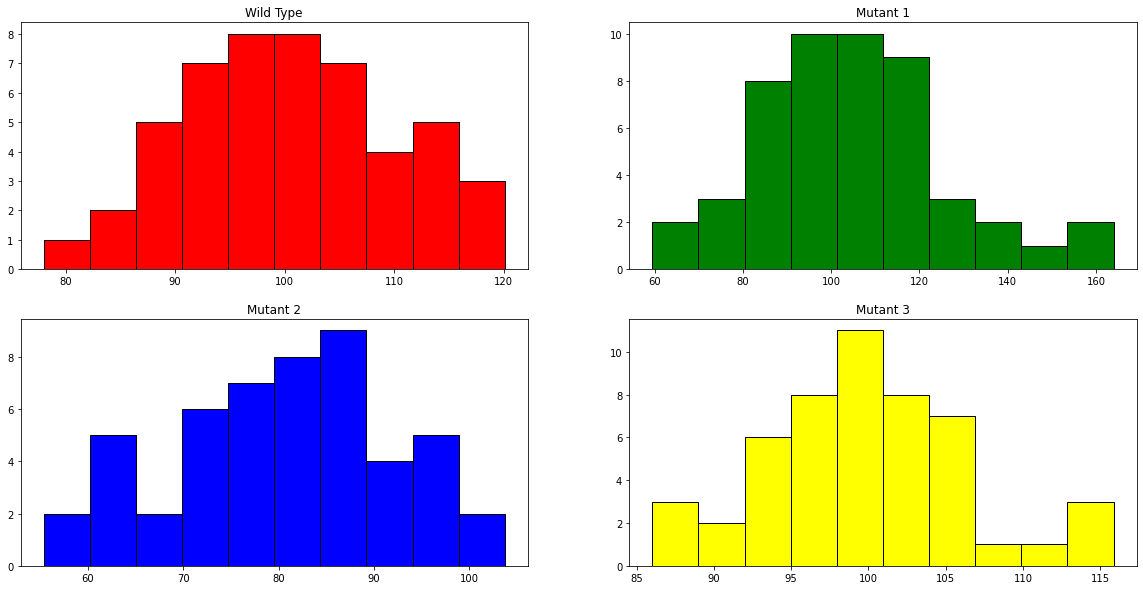

In [13]:
plt.figure (figsize = (20,10))

plt.subplot(221)
plt.hist(df['Wild type (nm)'], 10, color = 'red', ec ='black')
plt.title('Wild Type')

plt.subplot(222)
plt.hist(df['Mutant 1 (nm)'], 10, color = 'green', ec ='black')
plt.title('Mutant 1')

plt.subplot(223)
plt.hist(df['Mutant 2 (nm)'], 10, color = 'blue', ec ='black')
plt.title('Mutant 2')

plt.subplot(224)
plt.hist(df['Mutant 3 (nm)'], 10, color = 'yellow', ec ='black')
plt.title('Mutant 3')

Text(0.5, 1.0, 'Comparison of Means of Each Experimental Condition')

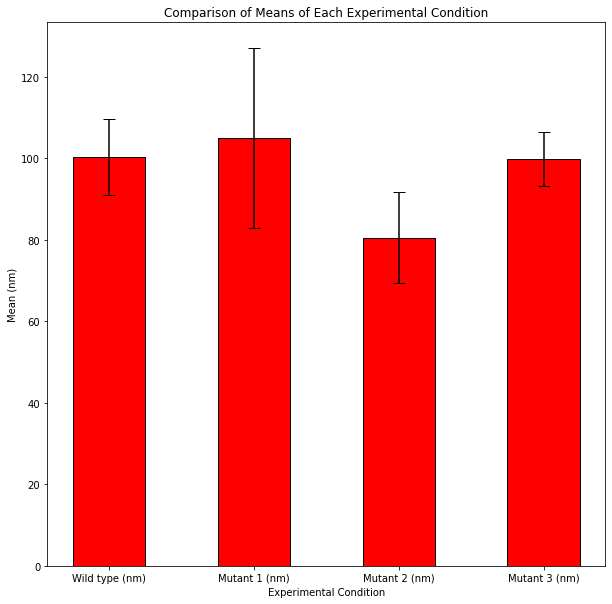

In [14]:
r = np.arange(len(means))

plt.figure(figsize = (10,10))
plt.bar(r, means, yerr = stds, color = 'red', width = 0.5, ec = 'black', capsize = 6)
plt.xlabel('Experimental Condition')
plt.xticks (r, names)
plt.ylabel('Mean (nm)')
plt.title('Comparison of Means of Each Experimental Condition')

### Part (d) - Inferential Statistics:
    
1. Use the Shapiro-Wilk test to check for normality of each experimental group, and print the names of the group that pass the test (α = 0.1)    **(2 points)**
<br>

2. Excluding the experimental group (if any) that did not pass the Shapiro-Wilk test, perform a one way ANOVA of the remaining groups (α = 0.02)                 **(2 points)**
<br>  

3. Perform Bonferroni Correction post-hoc tests to determine inter group significance for all possible combinations  **(4 points)**
<br>  

4. Comment on the results of the post-hoc test                                             **(2 points)**

______________________________________________________________________________________________________________________

In [23]:
for i in range (4):
        shapiro_result = stats.shapiro(df.iloc[:, i+1])
        if shapiro_result[1] > 0.1:
            print(f'Group {names[i]} passed the shapiro test with a pvalue of {shapiro_result[1]}')

print(stats.f_oneway(*[df.iloc[:, i+1] for i in range (4)]))

correct_a = 0.02/3
print(f'Corrected Alpha Level: {correct_a}')

for i, j in [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]:
    if stats.ttest_ind(df.iloc[:, i], df.iloc[:, j]).pvalue < correct_a:
        print(f'Significant difference between {names[i-1]} and {names[j-1]}')

Group Wild type (nm) passed the shapiro test with a pvalue of 0.9309117794036865
Group Mutant 1 (nm) passed the shapiro test with a pvalue of 0.2506052255630493
Group Mutant 2 (nm) passed the shapiro test with a pvalue of 0.8762485384941101
Group Mutant 3 (nm) passed the shapiro test with a pvalue of 0.5690012574195862
F_onewayResult(statistic=31.329820405450654, pvalue=1.3715605017138858e-16)
Corrected Alpha Level: 0.006666666666666667
Significant difference between Wild type (nm) and Mutant 2 (nm)
Significant difference between Mutant 1 (nm) and Mutant 2 (nm)
Significant difference between Mutant 2 (nm) and Mutant 3 (nm)


Significant difference between wild type and mutant 2, mutant 1 and mutant 2, and mutant 2 and mutant 3: comparison between these reject the corrected alpha level